# Introduction to Statistics in Python

In [1]:
# Importing numpy and pandas
import numpy as np
import pandas as pd
import seaborn as sns

# Importing the course datasets
amir_deals = pd.read_csv("datasets/amir_deals.csv")
world_happiness = pd.read_csv("datasets/world_happiness.csv")
food = pd.read_csv("datasets/food_consumption.csv")

## Summary Statistics

### Descriptive and inferential statistics
Statistics can be used to answer lots of different types of questions, but being able to identify which type of statistics is needed is essential to drawing accurate conclusions.

**Descriptive : Describing and summarizing data that has been collected.**
- Given the data on every customer service request made, what's the average time it took to respond
- Given data on all 100,000 people who viewed an ad, what percent of people clicked on it?

**Inferential : involves making inferences or predictions about a population based on a sample of data**
- After interviewing 100 customers, what percent of all your customers are satisfied with your product?
- Given data on 20 fish caught in a lake, what's the average weight of all fish in the lake?

### Data type classification

Two main types of data: **numeric** and **categorical**. 
- **Numeric** variables can be classified as either **discrete** or **continuous**
- **Categorical** variables can be classified as either **nominal** or **ordinal**. 
These characteristics of a variable determine which ways of summarizing your data will work best.

**Continuous numeric**
- Air temperature
- Kilowatts of electricity used

**Discrete numeric**
- Number items in stock
- Number of course taken
- Number clicks on an add

**Categorical**
- Brand of product
- Zip code

### Mean and median

The **food_consumption** dataset contains information about the kilograms of food consumed per person per year in each country in each food category (consumption) as well as information about the carbon footprint of that food category (co2_emissions) measured in kilograms of carbon dioxide, or CO2, per person per year in each country.

In [2]:
# Import numpy as np
import numpy as np

# Subset for Belgium and USA only
be_and_usa = food[(food["country"] == "Belgium") | (food["country"] == "USA")]

# Group by country, select consumption column, and compute mean and median
print(be_and_usa.groupby("country")["consumption"].agg([np.mean,np.median]))

              mean  median
country                   
Belgium  42.132727   12.59
USA      44.650000   14.58


### Mean vs. median


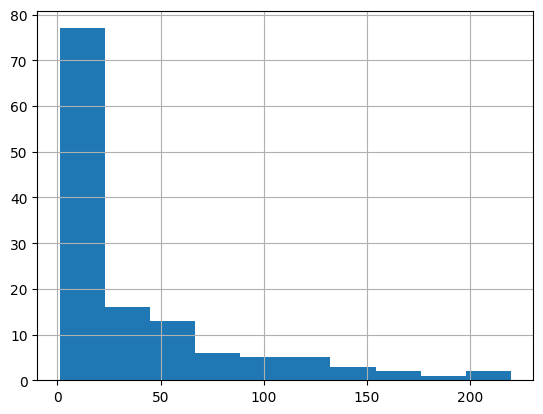

In [3]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Subset for food_category equals rice
rice_consumption = food[food['food_category'] == 'rice']

# Histogram of co2_emission for rice and show plot
rice_consumption['co2_emission'].hist()
plt.show()

Shape of the data is **Right-Skewed**

In [4]:
rice_consumption[["consumption","co2_emission"]].agg([np.mean,np.median])

,consumption,co2_emission
mean,29.375154,37.591615
median,11.875000,15.200000


It's better to use **median** as our **center measurement** when there's **skewed distribution** in the data. **Mean** is highly affected by the presence of **outlier** in the data

### Quartiles, quantiles, and quintiles

Quantiles are a great way of summarizing numerical data since they can be used to measure center and spread, as well as to get a sense of where a data point stands in relation to the rest of the data set. For example, you might want to give a discount to the 10% most active users on a website.

In [5]:
# Calculate the quartiles of co2_emission
print("Quartiles of co2_emission: ")
print(np.quantile(food["co2_emission"],[0,0.25,0.5,0.75,1]))

# Calculate the quintiles of co2_emission
print("\n Quintiles of co2_emission: ")
print(np.quantile(food["co2_emission"],np.linspace(0,1,6)))

# Calculate the deciles of co2_emission
print("\n Deciles of co2_emission: ")
print(np.quantile(food["co2_emission"],np.linspace(0,1,11)))

Quartiles of co2_emission: 
[   0.        5.21     16.53     62.5975 1712.    ]

 Quintiles of co2_emission: 
[   0.       3.54    11.026   25.59    99.978 1712.   ]

 Deciles of co2_emission: 
[0.00000e+00 6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01
 2.55900e+01 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]


### Variance and standard deviation

Variance and standard deviation are two of the most common ways to measure the spread of a variable.

Spread is important since it can help inform expectations. For example, if a salesperson sells a mean of 20 products a day, but has a standard deviation of 10 products, there will probably be days where they sell 40 products, but also days where they only sell one or two. Information like this is important, especially when making predictions.

                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570



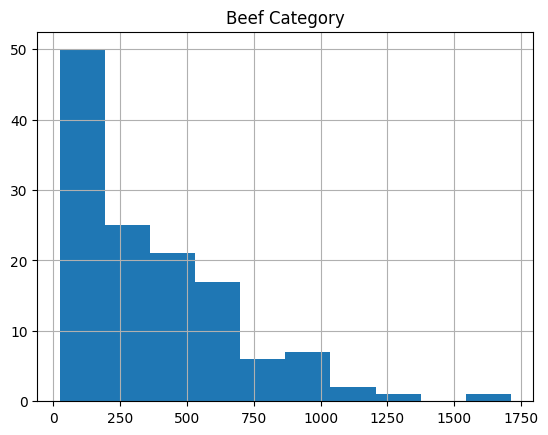

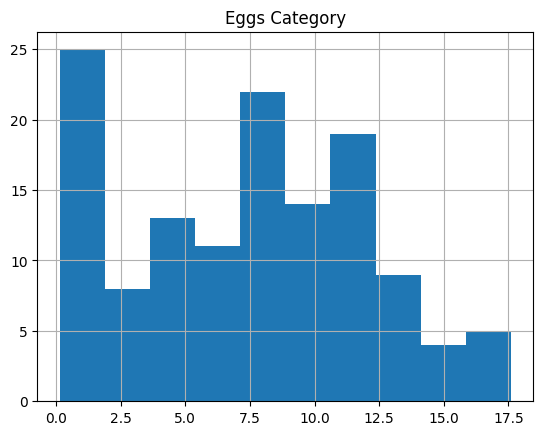

In [6]:
# Print variance and sd of co2_emission for each food_category
print(food.groupby('food_category')['co2_emission'].agg([np.var, np.std]))
print("")
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Create histogram of co2_emission for food_category 'beef'
food[food['food_category'] == 'beef']['co2_emission'].hist()
#Add title
plt.title("Beef Category")
# Show plot
plt.show()

# Create histogram of co2_emission for food_category 'eggs'
food[food['food_category'] == 'eggs']['co2_emission'].hist()
#Add title
plt.title("Eggs Category")
# Show plot
plt.show()

**Beef** has the **largest** amount of **variation** in its **CO2 emissions**, while **eggs** have a relatively **small** amount of **variation**.

### Finding outliers using IQR

Outliers can have big effects on statistics like mean, as well as statistics that rely on the mean, such as variance and standard deviation. Interquartile range, or IQR, is another way of measuring spread that's less influenced by outliers.

![Screen Shot 2020-04-28 at 10.04.54 AM](Screen%20Shot%202020-04-28%20at%2010.04.54%20AM.png)

In [7]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food.groupby('country')['co2_emission'].sum()

# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64


It looks like Argentina has a substantially higher amount of CO2 emissions per person than other countries in the world.

## Random Numbers and Probability

### With or without replacement?

The main difference between **with replacement** and **without replacement** is that **with replacement**, each selection is **independent** of the previous selection, while **without replacement**, the probability of each selection **depends** on the previous selections. 

Additionally, **with replacement**, the **size** of the group remains **constant** throughout the selection process, while **without replacement**, the **size** of the group **decreases** with each selection.

**With Replacement**
- Rolling a die twice
- Flipping a coin 3 times

**Without Replacement**
- Randomly picking 3 people to work on the weekend from a group of 20 people
- From a deck of cards, dealing 3 players 7 cards each
- Randomly selecting 5 products from the assembly line to test for quality assurance

### Calculating probabilities

Recall that the probability of an event can be calculated by

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>P</mi>
  <mo stretchy="false">(</mo>
  <mtext>event</mtext>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mfrac>
    <mtext># ways event can happen /</mtext>
    <mtext>total # of possible outcomes</mtext>
  </mfrac>
</math>

In [8]:
# Count the deals for each product
counts = amir_deals['product'].value_counts()

# Calculate probability of picking a deal with each product
probs = counts / amir_deals['product'].count()
print(probs)

Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: product, dtype: float64


If you randomly select one of Amir's deals, what's the probability that the deal will involve **Product C**?

The chances are **0.084 %**

### Sampling deals

In [9]:
# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
amir_deals.sample(5)

,Unnamed: 0,product,client,status,amount,num_users
127,128,Product B,Current,Won,2070.25,7
148,149,Product D,Current,Won,3485.48,52
77,78,Product B,Current,Won,6252.30,27
104,105,Product D,Current,Won,4110.98,39
166,167,Product C,New,Lost,3779.86,11


In [10]:
# Sample 5 deals with replacement
amir_deals.sample(5,replace=True)

,Unnamed: 0,product,client,status,amount,num_users
133,134,Product D,Current,Won,5992.86,98
101,102,Product H,Current,Won,5116.34,63
110,111,Product B,Current,Won,696.88,44
49,50,Product B,Current,Won,3488.36,79
56,57,Product D,Current,Won,6820.84,42


### Discrete Distribution

**Discrete distributions** are a way of calculating the probabilities of discrete random variables, which are variables that can only take on specific values, such as whole numbers. 

Common examples of discrete distributions include the binomial and Poisson distributions. In these distributions, probabilities are calculated for each possible value, and the sum of all these probabilities is equal to 1. 

These distributions are used in many areas, including statistics, probability theory, economics, and engineering.

**The law of large numbers**, in probability and statistics, states that as a **sample size grows**, its mean gets closer to the **average** of the whole **population**.

In [11]:
#Make a new dataframe
restaurant_groups = pd.DataFrame(
            {
                "group_id" : ["A","B","C","D","E","F","G","H","I","J"],
                "group_size" : [2,4,6,2,2,2,3,2,4,2]
            }
)

# Create probability distribution
size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups.shape[0]

# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

print(size_dist)

   group_size  prob
0           2   0.6
1           4   0.2
2           6   0.1
3           3   0.1


In [12]:
# Expected value
expected_value = np.sum(size_dist['group_size'] * size_dist['prob'])
print(expected_value)

2.9000000000000004


In [13]:
# Subset groups of size 4 or more
groups_4_or_more = size_dist[size_dist['group_size'] >= 4]

# Sum the probabilities of groups_4_or_more
prob_4_or_more = np.sum(groups_4_or_more['prob'])
print(prob_4_or_more)

0.30000000000000004


The **probability** of **randomly** picking a group of **4** or **more** people is **0.3%**

### Continuous Distribution

A continuous distribution is a statistical distribution that represents the probability of observing a continuous range of values for a particular variable. In contrast to a discrete distribution, which represents the probability of observing a set of distinct values, a continuous distribution can take on an infinite number of values within a range.

In [14]:
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

# Import uniform from scipy.stats
from scipy.stats import uniform

**"Less Than"**

In [15]:
# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5,min_time,max_time)
print(prob_less_than_5)

0.16666666666666666


**"Greater Than"**

In [16]:
# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = 1- uniform.cdf(5,min_time,max_time)
print(prob_greater_than_5)

0.8333333333333334


**"In Between"**

In [17]:
# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20,min_time,max_time) - uniform.cdf(10,min_time,max_time)
print(prob_between_10_and_20)

0.3333333333333333


**Simulating Continuous Distribution**

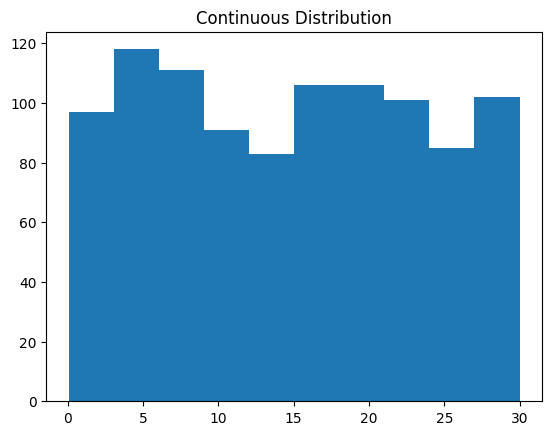

In [18]:
# Set random seed to 334
np.random.seed(334)

# Import uniform
from scipy.stats import uniform

# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0, 30, size=1000)

# Create a histogram of simulated times and show plot
plt.hist(wait_times)
plt.title("Continuous Distribution")
plt.show()

### Binomial Distribution

Probability distribution of the number of successes in a sequence of **independent** trials

E.g. Number of heads in a sequence of coin flips

**Simulating sales deals**

Assume that Amir usually works on 3 deals per week, and overall, he wins 30% of deals he works on. Each deal has a binary outcome: it's either lost, or won, so you can model his sales deals with a binomial distribution.

In [19]:
# Import binom from scipy.stats
from scipy.stats import binom

# Set random seed to 10
np.random.seed(10)

In [20]:
# Simulate a single deal
print(binom.rvs(3, 0.3, size=1))

[1]


In [21]:
# Simulate 52 weeks of 3 deals
deals = binom.rvs(3,0.3,size=52)

# Print mean deals won per week
print(deals.mean())

0.8461538461538461


 In this simulated year, Amir won **0.84** deals on **average** each week.

**Calculating binomial probabilities**
binom.pmf(#succes,#trials,prob of success)

Assume that Amir wins 30% of deals. He wants to get an idea of how likely he is to close a certain number of deals each week



In [22]:
# Probability of closing 3 out of 3 deals
prob_3 = binom.pmf(3,3,0.3)

print(prob_3)

0.026999999999999996


In [23]:
# Probability of closing <= 1 deal out of 3 deals
prob_less_than_or_equal_1 = binom.cdf(1,3,0.3)

print(prob_less_than_or_equal_1)

0.784


In [24]:
# Probability of closing > 1 deal out of 3 deals
prob_greater_than_1 = 1 - binom.cdf(1,3,0.3)

print(prob_greater_than_1)

0.21599999999999997


In [25]:
# Expected number won with 30% win rate
# Calculate the expected number of sales out of the 3 he works on that Amir will win each week if he maintains his 30% win rate.
won_30pct = 3 * 0.3
print(won_30pct)

# Expected number won with 25% win rate
# Calculate the expected number of sales out of the 3 he works on that Amir will win each week if he maintains his 30% win rate.
won_25pct = 3 * 0.25
print(won_25pct)

# Expected number won with 35% win rate
# Calculate the expected number of sales out of the 3 he works on that Amir will win each week if he maintains his 30% win rate.
won_35pct = 3 * 0.35
print(won_35pct)

0.8999999999999999
0.75
1.0499999999999998


## More Distributions and the Central Limit Theorem

### The Normal Distribution

**Normal distribution**, also known as **Gaussian distribution**, is a **continuous probability distribution**. It is a **bell-shaped distribution** that is **symmetric around the mean**, and its shape is determined by two parameters: the **mean (μ)** and the **standard deviation (σ)**.

The normal distribution has several important characteristics:
- **Symmetry**: The distribution is symmetric around the mean, which is located at the center of the distribution.
- **Bell-shaped curve**: The distribution has a bell-shaped curve that is smooth and continuous.
- **Central Limit Theorem**: The normal distribution arises naturally in many situations due to the Central Limit Theorem, which states that the sum of a large number of independent and identically distributed random variables will tend to follow a normal distribution.
- **Standardization**: The normal distribution can be standardized by subtracting the mean and dividing by the standard deviation. The resulting standardized variable has a mean of 0 and a standard deviation of 1, and is known as a standard normal distribution.
- **Empirical Rule**: The normal distribution has a well-known empirical rule, which states that approximately 68% of the data falls within one standard deviation of the mean, 95% of the data falls within two standard deviations of the mean, and 99.7% of the data falls within three standard deviations of the mean.

![Standard-normal-distribution](Standard-normal-distribution.jpg)


**Distribution of Amir's sales**

A histogram with 10 bins to visualize the distribution of the amount.

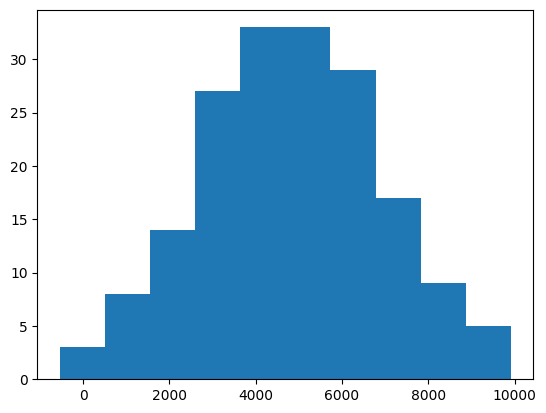

In [26]:
# Histogram of amount with 10 bins and show plot
amir_deals['amount'].hist(bins=10)
plt.grid(False)
plt.show()

Probability distribution do the sales amounts most closely follow the **Normal distribution**

**Probabilities from the normal distribution**


norm.cdf(probability,mean,std)

In [27]:
from scipy.stats import norm


What's the probability of Amir closing a deal worth less than $7500?

In [28]:
# Probability of deal < 7500
prob_less_7500 = norm.cdf(7500,5000,2000)

print(prob_less_7500)

0.8943502263331446


What's the probability of Amir closing a deal worth more than $1000?

In [29]:
# Probability of deal > 1000
prob_over_1000 = 1-norm.cdf(1000,5000,2000)

print(prob_over_1000)

0.9772498680518208


What's the probability of Amir closing a deal worth between 3000 and 7000?

In [30]:
# Probability of deal between 3000 and 7000
prob_3000_to_7000 = norm.cdf(7000,5000,2000) - norm.cdf(3000,5000,2000)

print(prob_3000_to_7000)

0.6826894921370859


What amount will 25% of Amir's sales be less than?

In [31]:
# Calculate amount that 25% of deals will be less than
pct_25 = norm.ppf(0.25,5000,2000)

print(pct_25)

3651.0204996078364


### The Central Limit Theorm

The central limit theorem states that a **sampling distribution** of a sample statistic approaches the **normal distribution** as you take more samples, no matter the original distribution being sampled from.

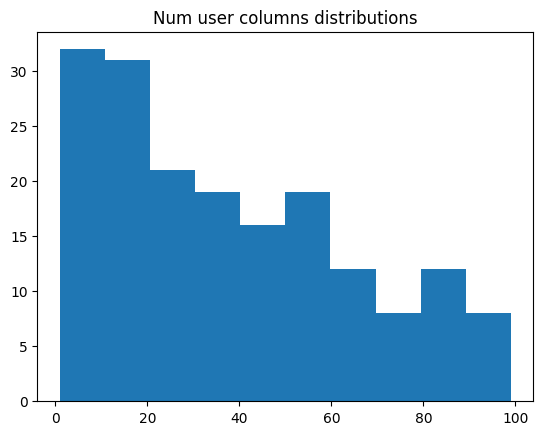

In [32]:
# Create a histogram of num_users and show
amir_deals["num_users"].hist()
plt.grid(False)
plt.title("Num user columns distributions")
plt.show()

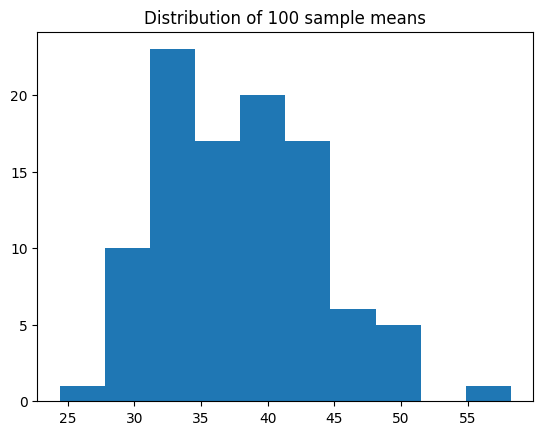

In [33]:
# Set seed to 104
np.random.seed(104)

sample_means = []
# Loop 100 times
for i in range(100):
  # Take sample of 20 num_users
  samp_20 = amir_deals['num_users'].sample(20, replace=True)
  # Calculate mean of samp_20
  samp_20_mean = np.mean(samp_20)
  # Append samp_20_mean to sample_means
  sample_means.append(samp_20_mean)
  
# Convert to Series and plot histogram
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
# Show plot
plt.title("Distribution of 100 sample means")
plt.grid(False)
plt.show()

Even though the distribution of **num_users** is not normal, the distribution of its sample means resembles the **normal distribution**

### Poisson Distribution

Poisson distribution is a probability distribution that describes the probability of a given number of events occurring in a fixed interval of time or space, assuming that the events occur independently and at a constant rate.

The Poisson distribution is characterized by a single parameter, λ (lambda), which represents the expected number of events in the given interval.

**More about poisson**

Calculate the probability that Amir responds to 5 leads in a day, given that he responds to an average of 4.

In [34]:
# Import poisson from scipy.stats
from scipy.stats import poisson

# Probability of 5 responses
prob_5 = poisson.pmf(5,4)

print(prob_5)

0.1562934518505317


Amir's coworker responds to an average of 5.5 leads per day. What is the probability that she answers 5 leads in a day?

In [35]:
# Import poisson from scipy.stats
from scipy.stats import poisson

# Probability of 5 responses
prob_coworker = poisson.pmf(5,5.5)

print(prob_coworker)

0.17140068409793663


What's the probability that Amir responds to 2 or fewer leads in a day?

In [36]:
# Import poisson from scipy.stats
from scipy.stats import poisson

# Probability of 2 or fewer responses
prob_2_or_less = poisson.cdf(2,4)

print(prob_2_or_less)

0.23810330555354436


What's the probability that Amir responds to more than 10 leads in a day?

In [37]:
# Import poisson from scipy.stats
from scipy.stats import poisson

# Probability of > 10 responses
prob_over_10 = 1 - poisson.cdf(10,4)

print(prob_over_10)

0.0028397661205137315



### Exponential distribution

The exponential distribution is a probability distribution that models the time between two consecutive events in a Poisson process, where the events occur randomly and independently over time, and the average number of events per unit of time is constant. It is a continuous distribution with a single parameter, λ, called the rate parameter.

![Exponential-Distribution](Exponential-Distribution.png)

- What's the probability it takes Amir more than 4 hours to respond to a lead?

In [38]:
# Import expon from scipy.stats
from scipy.stats import expon

# Print probability response takes > 4 hours
print(1- expon.cdf(4, scale=2.5))

0.20189651799465536


- What's the probability it takes Amir 3-4 hours to respond to a lead?

In [39]:
# Import expon from scipy.stats
from scipy.stats import expon

# Print probability response takes 3-4 hours
print(expon.cdf(4, scale=2.5) - expon.cdf(3, scale=2.5))

0.09929769391754684


## Correlation and Experimental Design

Correlation is a way to measure the **relationship** between **two or more things**. It tells us how much two things are **related**, and in what direction. 
- A **positive** correlation means that when one thing goes up, the other thing goes up too. 
- A **negative** correlation means that when one thing goes up, the other thing goes down. 
- A correlation of **zero** means there is no relationship between the two things. 
Correlation is useful for understanding how things are related and for making predictions.

**Relationships between variables**

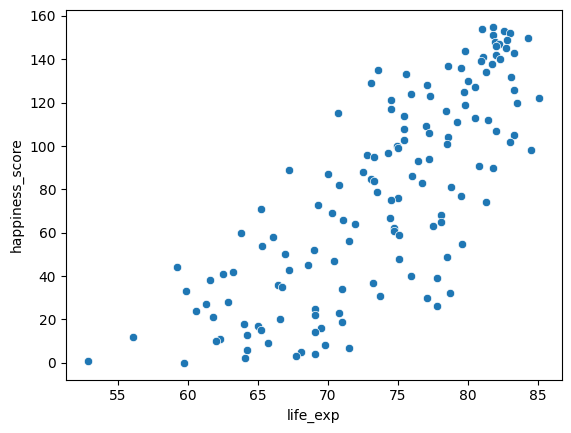

In [40]:
# Create a scatterplot of happiness_score vs. life_exp and show
sns.scatterplot(x='life_exp',y='happiness_score',data=world_happiness)
plt.show()

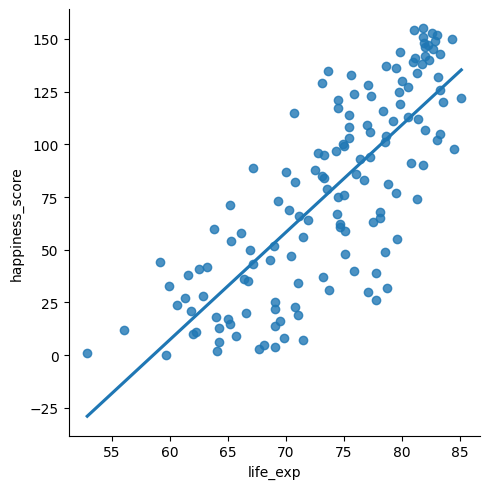

Coorelation value: 0.7802249053272062


In [41]:
# Create scatterplot of happiness_score vs life_exp with trendline
sns.lmplot(x='life_exp', y='happiness_score', data=world_happiness, ci=None)

# Show plot
plt.show()

# Correlation between life_exp and happiness_score
cor = world_happiness['life_exp'].corr(world_happiness['happiness_score'])

print(f'Coorelation value: {cor}')

Scatterplots with trendlines are a great way to verify that a relationship between two variables is indeed linear.

**What can't correlation measure?**

While the correlation coefficient is a convenient way to quantify the strength of a relationship between two variables, it's far from perfect.

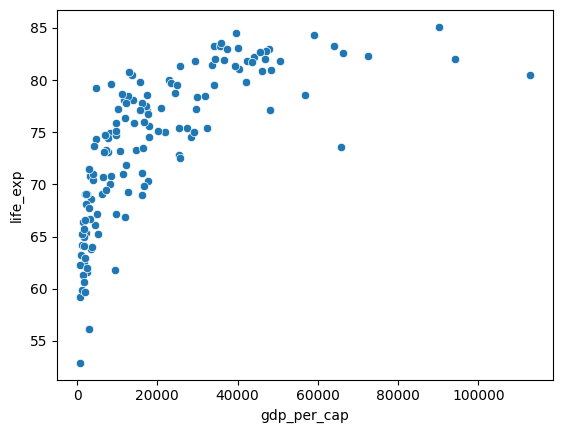

Coorelation Value: 0.7019547642148012


In [42]:
# Scatterplot of gdp_per_cap and life_exp
sns.scatterplot(x='gdp_per_cap', y='life_exp', data=world_happiness)

# Show plot
plt.show()
  
# Correlation between gdp_per_cap and life_exp
cor = world_happiness["gdp_per_cap"].corr(world_happiness["life_exp"])

print(f'Coorelation Value: {cor}')

The correlation between GDP per capita and life expectancy is 0.7. Correlation not the best way to measure the relationship between these two variables because correlation only measures **linear relationships**.

The correlation coefficient can't account for any relationships that aren't **linear**, regardless of strength.

**Transforming variables**

When variables have skewed distributions, they often require a transformation in order to form a linear relationship with another variable so that correlation can be computed. 

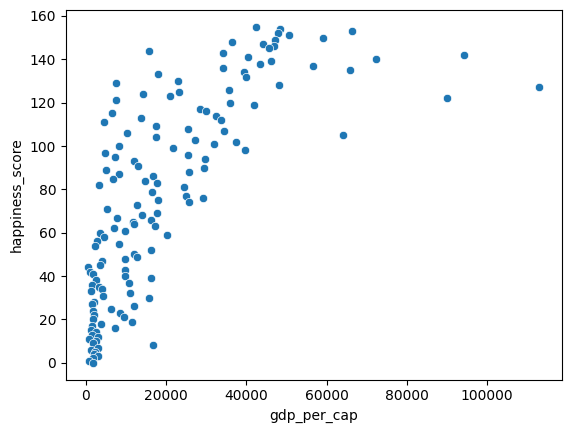

Coorelation Value: 0.727973301222298


In [43]:
# Scatterplot of happiness_score vs. gdp_per_cap
sns.scatterplot(x="gdp_per_cap",y="happiness_score",data=world_happiness)
plt.show()

# Calculate correlation
cor = world_happiness["happiness_score"].corr(world_happiness["gdp_per_cap"])
print(f'Coorelation Value: {cor}')

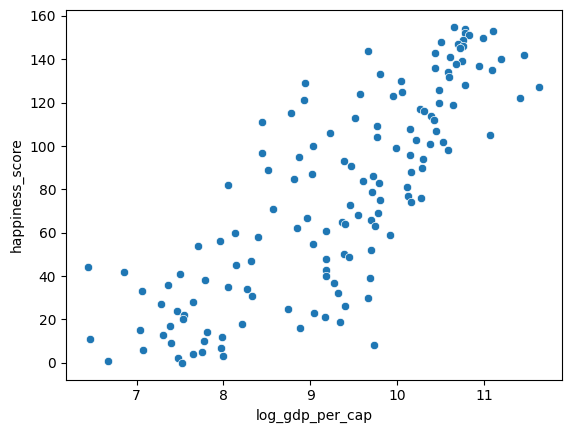

Coorelation Value (After Transformation): 0.8043146004918288


In [44]:
# Create log_gdp_per_cap column
world_happiness['log_gdp_per_cap'] = np.log(world_happiness['gdp_per_cap'])

# Scatterplot of log_gdp_per_cap and happiness_score
sns.scatterplot(x="log_gdp_per_cap",y="happiness_score",data=world_happiness)
plt.show()

# Calculate correlation
cor = world_happiness['log_gdp_per_cap'].corr(world_happiness['happiness_score']) 
print(f'Coorelation Value (After Transformation): {cor}')

The relationship between GDP per capita and happiness became more **linear** by applying a **log transformation**. **Log transformations** are great to use on variables with a **skewed distribution**, such as GDP.

One thing to note is, **correlation** does not mean **causation**, which mean if variable A highly correlated with variable B, it doesnt mean that variable B will happen if variable A is happening. Between variable A and B is called **associated**